In [ ]:
# given these home prices find out price of a home that has,
# 3000 sqr ft area,3 bedrooms,40year old
# 2500 sqr ft area,4 bedrooms,5year old

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [4]:
df = pd.read_csv("homeprices.csv")
print(df)

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


In [5]:
import math
median_bedrooms = math.floor(df.bedrooms.median())

In [6]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
print(df)

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000


In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [8]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [9]:
reg.intercept_

221323.00186540402

In [10]:
reg.predict([[3000,3,40]])

/home/ruchikhandelwal/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [11]:
reg.predict([[2500,4,5]])

/home/ruchikhandelwal/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [12]:
 112.06244194*3000+23388.88007794*3-3231.71790863*40+221323.00186540402

498408.25157402403

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age
- bedrooms


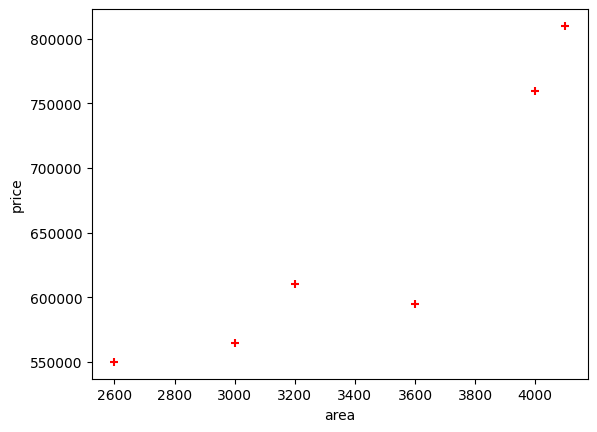

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming df is your DataFrame and reg is your regression model

# Scatter plots and regression lines for each feature
features = ['area', 'bedrooms', 'age']
for feature in features:
    plt.figure()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.scatter(df[feature], df['price'], color='red', marker='+')
    plt.plot(df[feature], reg.predict(df[[feature]]), color='blue')
    plt.show()
